In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from SimulationController import SimulationController
from algorithms.EpsilonGreedy import EpsilonGreedy
from algorithms.UCB import UCB
from problems.StochasticMAB import NormalBanditProblem

In [3]:
n_arms = 10
n_runs = 1000
n_timesteps = 1000

In [4]:
def draw_plot(data, algos, ylabel, xlabel='time', loc='lower right'):
    fig = plt.figure(figsize=(8, 7))
    for i in range(data.shape[0]):
        plt.plot(data[i], label=algos[i])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(loc=loc)
    plt.show()

## First Experiment

In [5]:
problem = NormalBanditProblem(n_arms)
problem.set_problem()
models = {
    'eps-greedy(0.0)': EpsilonGreedy(n_arms, 0.0),
    'eps-greedy(0.01)': EpsilonGreedy(n_arms, 0.01),
    'eps-greedy(0.1)': EpsilonGreedy(n_arms, 0.1),
}
algos = [model for model, _ in models.items()]

In [6]:
simulation_controller = SimulationController(n_arms, n_runs, n_timesteps, models, problem)

In [7]:
opt_arm_ratio, regret, cumulative_reward = simulation_controller.run()

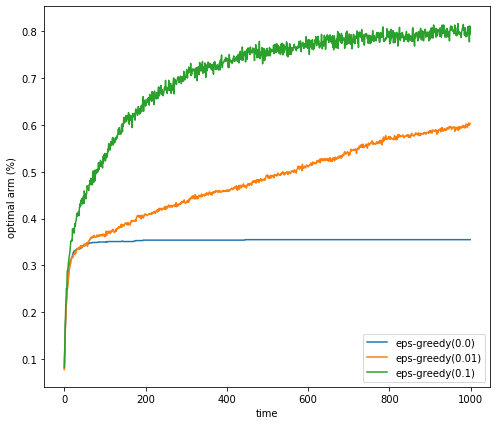

In [8]:
draw_plot(opt_arm_ratio, algos, 'optimal arm (%)')

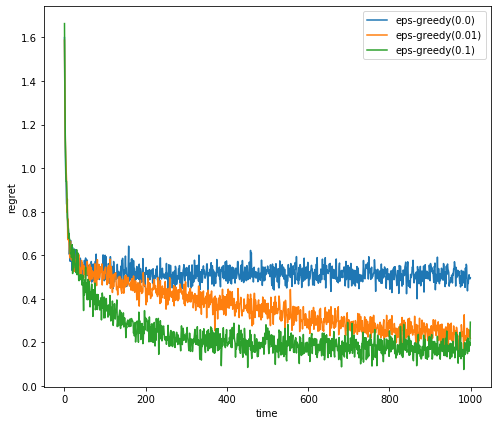

In [9]:
draw_plot(regret, algos, 'regret', loc='upper right')

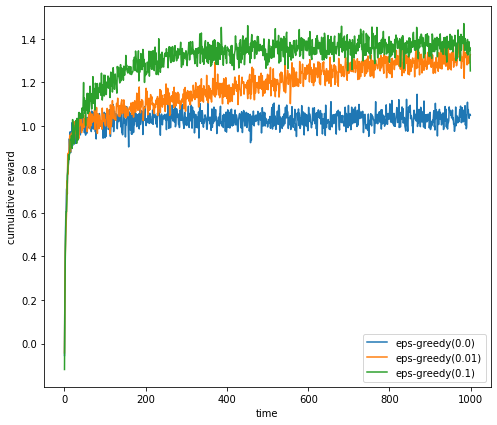

In [10]:
draw_plot(cumulative_reward, algos, 'cumulative reward')

## Second experiment

In [11]:
models = {
    'eps-greedy(0.0) w/ optimistic value': EpsilonGreedy(n_arms, 0.0, optimistic_factor=4.0),
    'eps-greedy(0.1)': EpsilonGreedy(n_arms, 0.1),
}
algos = [model for model, _ in models.items()]

In [13]:
simulation_controller = SimulationController(n_arms, n_runs, n_timesteps, models, problem)

In [14]:
opt_arm_ratio, regret, cumulative_reward = simulation_controller.run()

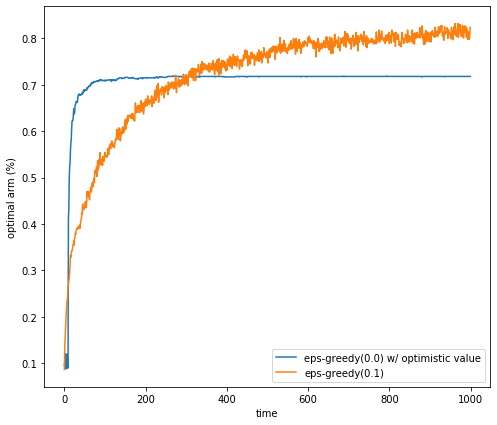

In [15]:
draw_plot(opt_arm_ratio, algos, 'optimal arm (%)')

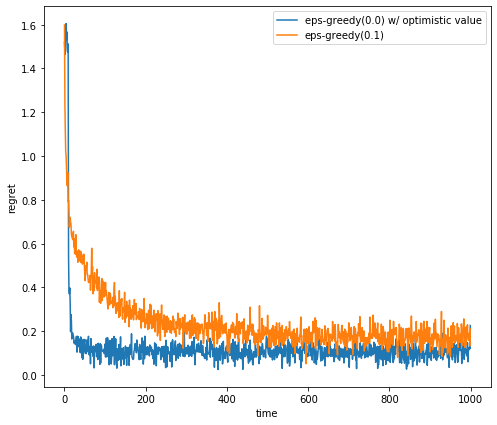

In [16]:
draw_plot(regret, algos, 'regret', loc='upper right')

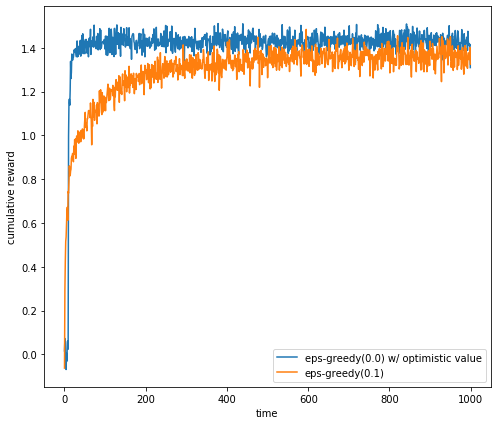

In [17]:
draw_plot(cumulative_reward, algos, 'cumulative reward')

## Third Experiment

In [18]:
models = {
    'UCB(2.0)': UCB(n_arms, 2.0),
    'UCB(1.0)': UCB(n_arms, 1.0),
    'eps-greedy(0.1)': EpsilonGreedy(n_arms, 0.1),
    'eps-greedy(0.05)': EpsilonGreedy(n_arms, 0.05),
}
algos = [model for model, _ in models.items()]

In [20]:
simulation_controller = SimulationController(n_arms, n_runs, n_timesteps, models, problem)

In [21]:
opt_arm_ratio, regret, cumulative_reward = simulation_controller.run()

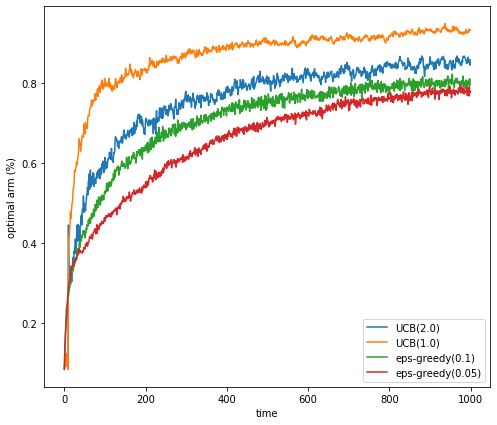

In [22]:
draw_plot(opt_arm_ratio, algos, 'optimal arm (%)')

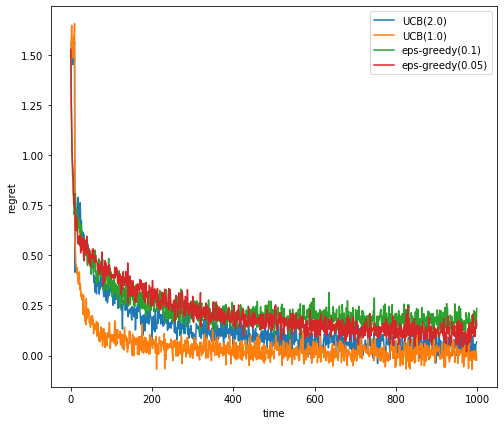

In [23]:
draw_plot(regret, algos, 'regret', loc='upper right')

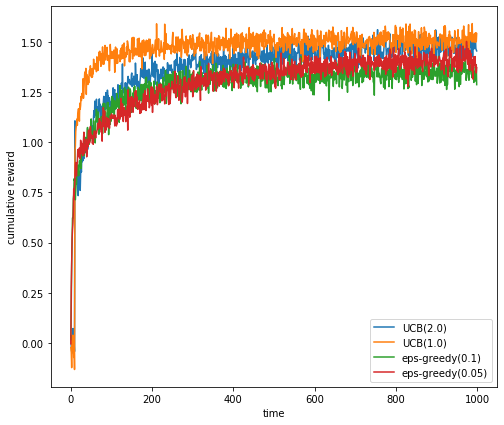

In [24]:
draw_plot(cumulative_reward, algos, 'cumulative reward')